## Introducción a las series de tiempo

En esta sección se hará una revisión, estadística descriptiva, transformación y presentación de los datos. Servirá como una introducción a la manipulación de series de tiempo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_excel(r"PeruData.xlsx", sheet_name="Trimestral", skiprows=1)

In [3]:
df.columns

Index(['Trimestres',
       'Producto bruto interno por tipo de gasto (millones S/ 2007) - PBI',
       'Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna',
       'Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Consumo Privado',
       'Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Consumo Público',
       'Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Inversión Bruta Interna',
       'Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Inversión Bruta Interna - Inversión Bruta Fija - Privada',
       'Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Inversión Bruta Interna - Inversión Bruta Fija - Pública',
       'Producto bruto interno por tipo de gasto (millones S/ 2007) - Exportaciones',
       'Producto bruto interno por tipo de gasto (millones S/ 2007) - Importaciones',
       'Índice de preci

In [4]:
dta = df[[
    'Trimestres',
    'Producto bruto interno por tipo de gasto (millones S/ 2007) - PBI',
    'Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Consumo Privado',
    'Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Inversión Bruta Interna',
    'Índice de precios Lima Metropolitana (índice Dic.2021 = 100) - Índice de Precios al Consumidor (IPC)',
    'Tasas de interés del Banco Central de Reserva  - Tasa de Referencia de la Política Monetaria'   
]]

In [5]:
dta.rename({
    'Producto bruto interno por tipo de gasto (millones S/ 2007) - PBI': 'PBI',
    'Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Consumo Privado': 'ConsumoPrivado',
    'Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Inversión Bruta Interna': 'InversiónTotal',
    'Índice de precios Lima Metropolitana (índice Dic.2021 = 100) - Índice de Precios al Consumidor (IPC)': 'IPC',
    'Tasas de interés del Banco Central de Reserva  - Tasa de Referencia de la Política Monetaria': 'TasaRef'  
}, axis=1, inplace=True)

In [6]:
dta.head()

,Trimestres,PBI,ConsumoPrivado,InversiónTotal,IPC,TasaRef
0,1980T1,36357.477805,24238.848074,2953.415306,NaN,NaN
1,1980T2,43102.110211,24316.137863,11828.128894,NaN,NaN
2,1980T3,42344.482920,27480.414259,8451.614920,NaN,NaN
3,1980T4,45791.929063,28586.599803,11058.492780,NaN,NaN
4,1981T1,39025.874528,28249.574668,3744.554508,NaN,NaN


### Manipulaciones
Primero el índice se colocará en formato `datetime` 

In [7]:
dta["Año"] = dta["Trimestres"].str[:4]
dta["Trimestre"] = dta["Trimestres"].str[5:]
dta = dta.drop("Trimestres", axis=1)

# Índice
dta.set_index(["Año", "Trimestre"], inplace=True) 

In [8]:
dta.head()

PBI  ConsumoPrivado  InversiónTotal  IPC  TasaRef
Año  Trimestre                                                            
1980 1          36357.477805    24238.848074     2953.415306  NaN      NaN
     2          43102.110211    24316.137863    11828.128894  NaN      NaN
     3          42344.482920    27480.414259     8451.614920  NaN      NaN
     4          45791.929063    28586.599803    11058.492780  NaN      NaN
1981 1          39025.874528    28249.574668     3744.554508  NaN      NaN

#### 1) Logaritmos
Por lo general, se transforma las series en niveles (por ejemplo, en millones) para eliminar la tendencia exponencial que tiene. Los logaritmos reducen las dimensiones de las series, sobre todo aquellos valores muy grandes. En ese sentido, permite realizar un mejor análisis

In [9]:
dta["lnPBI"] = np.log(dta["PBI"])
dta["lnConsumoPrivado"] = np.log(dta["ConsumoPrivado"])
dta["lnInversiónTotal"] = np.log(dta["InversiónTotal"])

In [10]:
dta.head()

PBI  ConsumoPrivado  InversiónTotal  IPC  TasaRef  \
Año  Trimestre                                                               
1980 1          36357.477805    24238.848074     2953.415306  NaN      NaN   
     2          43102.110211    24316.137863    11828.128894  NaN      NaN   
     3          42344.482920    27480.414259     8451.614920  NaN      NaN   
     4          45791.929063    28586.599803    11058.492780  NaN      NaN   
1981 1          39025.874528    28249.574668     3744.554508  NaN      NaN   

                    lnPBI  lnConsumoPrivado  lnInversiónTotal  
Año  Trimestre                                                 
1980 1          10.501155         10.095712          7.990718  
     2          10.671327         10.098896          9.378236  
     3          10.653593         10.221229          9.042113  
     4          10.731863         10.260693          9.310954  
1981 1          10.571980         10.248834          8.228058

#### 2) Variaciones

Las variaciones se pueden realizar de dos maneras diferentes: variaciones interanuales de las series o sacando diferencias a los logaritmos

In [11]:
# Primera forma: variaciones interanuales

dta["PBI_var"] = (dta["PBI"]/dta["PBI"].shift(4)-1)*100
dta["ConsumoPrivado_var"] = (dta["ConsumoPrivado"]/dta["ConsumoPrivado"].shift(4)-1)*100
dta["InversiónTotal_var"] = (dta["InversiónTotal"]/dta["InversiónTotal"].shift(4)-1)*100

In [12]:
# Segunda forma: diferencias a los logaritmos

dta["PBI_var"] = (dta["lnPBI"] - dta["lnPBI"].shift(4))*100
dta["ConsumoPrivado_var"] = (dta["lnConsumoPrivado"] - dta["lnConsumoPrivado"].shift(4))*100
dta["InversiónTotal_var"] = (dta["lnInversiónTotal"] - dta["lnInversiónTotal"].shift(4))*100

In [13]:
dta.head()

PBI  ConsumoPrivado  InversiónTotal  IPC  TasaRef  \
Año  Trimestre                                                               
1980 1          36357.477805    24238.848074     2953.415306  NaN      NaN   
     2          43102.110211    24316.137863    11828.128894  NaN      NaN   
     3          42344.482920    27480.414259     8451.614920  NaN      NaN   
     4          45791.929063    28586.599803    11058.492780  NaN      NaN   
1981 1          39025.874528    28249.574668     3744.554508  NaN      NaN   

                    lnPBI  lnConsumoPrivado  lnInversiónTotal   PBI_var  \
Año  Trimestre                                                            
1980 1          10.501155         10.095712          7.990718       NaN   
     2          10.671327         10.098896          9.378236       NaN   
     3          10.653593         10.221229          9.042113       NaN   
     4          10.731863         10.260693          9.310954       NaN   
1981 1          10.571980         10.248834          8.228058  7.082498   

                ConsumoPrivado_var  InversiónTotal_var  
Año  Trimestre                                          
1980 1                         NaN                 NaN  
     2                         NaN                 NaN  
     3                         NaN                 NaN  
     4                         NaN                 NaN  
1981 1                   15.312176           23.734042

#### 3) Índices
Se puede manipular o crear índices, los cuales servirán para tener una noción de cuánto una variables ha crecido fijando una fecha en particular. El IPC está con un índice a diciembre-2021=100. Vamos a transformarla para colocarlo en índice 2007=100

In [14]:
dta["IPC_2007"] = (dta["IPC"]/ dta["IPC"][dta["IPC"].index.get_level_values(0) == '2007'].mean() )*100

In [15]:
dta[dta["IPC"].index.get_level_values(0) == '2007']

PBI  ConsumoPrivado  InversiónTotal        IPC  TasaRef  \
Año  Trimestre                                                                  
2007 1          73354.134         46181.0    14604.280160  62.944301      4.5   
     2          80625.955         47902.0    19618.342755  63.664257      4.5   
     3          80699.622         48878.0    17006.531832  64.446920      5.0   
     4          85013.289         49355.0    19958.597515  65.014312      5.0   

                    lnPBI  lnConsumoPrivado  lnInversiónTotal    PBI_var  \
Año  Trimestre                                                             
2007 1          11.203054         10.740324          9.589070   5.151809   
     2          11.297576         10.776913          9.884220   6.140661   
     3          11.298489         10.797083          9.741353  10.293183   
     4          11.350563         10.806794          9.901415  10.817577   

                ConsumoPrivado_var  InversiónTotal_var    IPC_2007  
Año  Trimestre                                                      
2007 1                    7.276898           10.774952   98.323666  
     2                    8.643631           13.673645   99.448290  
     3                    8.045227           48.371031  100.670868  
     4                    9.168614           37.414986  101.557177

### Estadística descriptiva y gráficos

In [16]:
print(f"La base de datos contiene {dta.shape[0]} observaciones y {dta.shape[1]} variables.")

La base de datos contiene 170 observaciones y 12 variables.


In [17]:
dta.dtypes

PBI                   float64
ConsumoPrivado        float64
InversiónTotal        float64
IPC                   float64
TasaRef               float64
lnPBI                 float64
lnConsumoPrivado      float64
lnInversiónTotal      float64
PBI_var               float64
ConsumoPrivado_var    float64
InversiónTotal_var    float64
IPC_2007              float64
dtype: object

In [18]:
dta.describe()

,PBI,ConsumoPrivado,InversiónTotal,IPC,TasaRef,lnPBI,lnConsumoPrivado,lnInversiónTotal,PBI_var,ConsumoPrivado_var,InversiónTotal_var,IPC_2007
count,169.000000,169.000000,169.000000,126.000000,76.000000,169.000000,169.000000,168.000000,165.000000,165.000000,163.000000,126.000000
mean,72477.317235,46686.550912,15036.869080,63.917909,3.381579,11.089632,10.658858,9.380162,2.917371,3.016735,3.836309,99.844514
std,33889.129149,21096.978089,9855.446969,21.604338,1.415670,0.443847,0.421050,0.758523,7.739036,7.915084,28.933762,33.747578
min,33934.510655,23229.036577,-747.400515,8.712466,0.250000,10.432188,10.053158,6.411344,-35.576611,-31.582406,-117.677959,13.609517
25%,44973.629044,29220.930905,7455.089400,52.800629,2.750000,10.713832,10.282641,8.919499,1.120760,0.649927,-8.287421,82.478497
50%,56186.467577,36684.398453,11052.043943,62.741201,3.500000,10.936431,10.510107,9.310662,4.472844,3.517347,4.602247,98.006408
75%,101056.170000,64560.297442,25459.996128,80.521824,4.250000,11.523432,11.075355,10.148106,6.282651,6.634938,19.946083,125.781060
max,146737.812314,91649.644649,33300.899190,104.439931,6.500000,11.896403,11.425728,10.413340,35.090386,26.808839,116.485669,163.142916


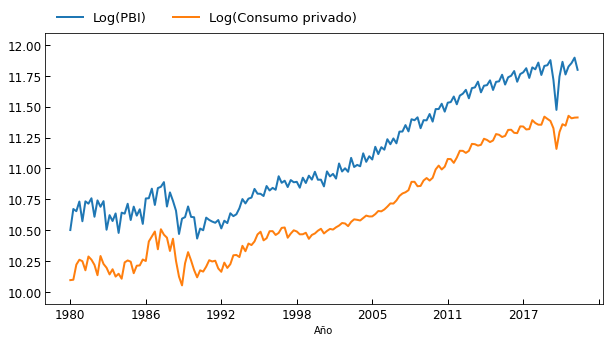

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

dta["lnPBI"].reset_index().plot(x="Año",y="lnPBI", linewidth=2, label="Log(PBI)", ax=ax)
dta["lnConsumoPrivado"].reset_index().plot(x="Año",y="lnConsumoPrivado",linewidth=2, label="Log(Consumo privado)", ax=ax)

ax.tick_params(axis="both", direction='in', which='both', length=5, width=1, labelsize=12)
ax.legend(bbox_to_anchor=(0, 1.12), loc='upper left', ncol=2, fontsize=13, frameon=False)
ax.set_ylim(9.9, 12.1)


plt.show()

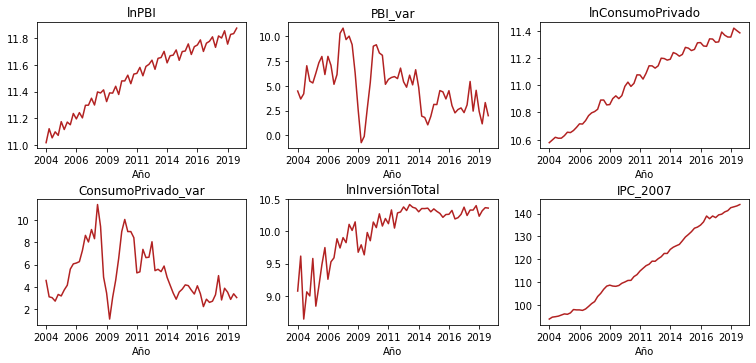

In [20]:
miniPlots= dta[["lnPBI", "PBI_var", "lnConsumoPrivado", "ConsumoPrivado_var", "lnInversiónTotal", "IPC_2007"]
              ][(dta.index.get_level_values(0) >= '2004')&(dta.index.get_level_values(0) <= '2019')]

plt.figure(figsize=(18,6))

for i in enumerate(miniPlots.columns):
    ax = plt.subplot(2, 3, i[0]+1)
    miniPlots[i[1]].reset_index().plot(x="Año", color="firebrick", ax=ax)
    plt.title(i[1])
    plt.legend().remove()
    
plt.subplots_adjust(top=0.8, bottom=0.1, left=0.2, right=0.75, hspace=0.4, wspace=0.2)

### Desestacionalización
Se eliminar el componente estacional de diferentes maneras:

(1) Mediante un `moving average`

In [21]:
dta_sa = dta[dta.index.get_level_values(0) < '2020']

dta_sa["lnPBI_sa"] = dta_sa["lnPBI"].rolling(window=12, center=True).mean() # Moving average

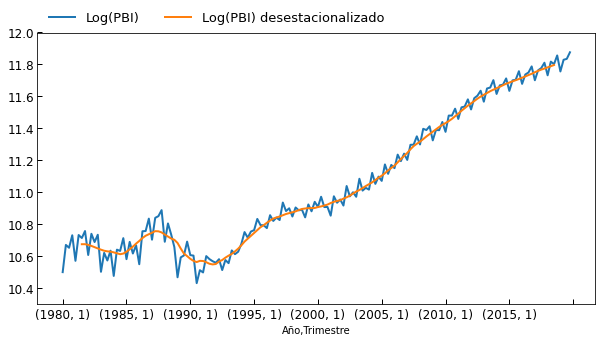

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))

dta_sa["lnPBI"].plot(linewidth=2, label="Log(PBI)")
dta_sa["lnPBI_sa"].plot(linewidth=2, label="Log(PBI) desestacionalizado")

ax.tick_params(axis="both", direction='in', which='both', length=5, width=1, labelsize=12)
ax.legend(bbox_to_anchor=(0, 1.12), loc='upper left', ncol=2, fontsize=13, frameon=False)
ax.set_ylim(10.3, 12)

plt.show()

In [23]:
dta_sa["PBI_resid"] = dta_sa["lnPBI"] - dta_sa["lnPBI_sa"]

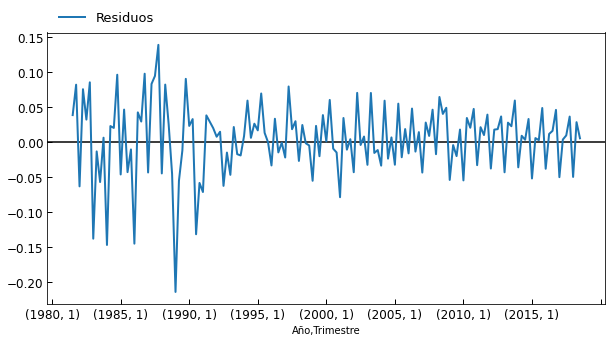

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.axhline(y=0, color='black', linestyle='-') # zero line
dta_sa["PBI_resid"].plot(linewidth=2, label="Residuos")

ax.tick_params(axis="both", direction='in', which='both', length=5, width=1, labelsize=12)
ax.legend(bbox_to_anchor=(0, 1.12), loc='upper left', ncol=2, fontsize=13, frameon=False)

plt.show()

(2) Mediante `statsmodels`

In [25]:
df = pd.read_excel(r"PeruData.xlsx", sheet_name="Mensual", skiprows=1, index_col="Meses")

y = df[["Producto bruto interno y demanda interna (índice 2007=100) - PBI"]]
y = y.rename({"Producto bruto interno y demanda interna (índice 2007=100) - PBI": "PBI"}, axis=1)
y = y[(y.index <= '2019-12-01')&(y.index >= '2003-01-01')]

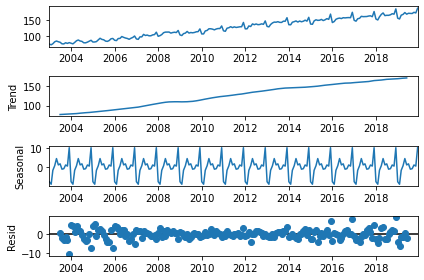

In [26]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(y, model="additive")

fig = decomposition.plot()

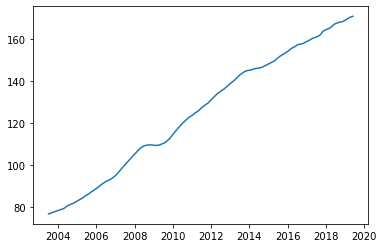

In [27]:
plt.plot(decomposition.trend)

plt.show()

### Test de autocorrelación

In [28]:
from statsmodels.formula.api import ols

y = dta_sa[["lnPBI_sa"]]
y["lnPBI_sa_1"] = y["lnPBI_sa"].shift(1) # Un rezago

y = y[(y.index.get_level_values(0) >= '1985')&(y.index.get_level_values(0) <= '2019')]

In [29]:
model = ols('lnPBI_sa ~ lnPBI_sa_1', data=y).fit()

(1) Test de Durbin-Watson

In [30]:
from statsmodels.stats.stattools import durbin_watson

In [31]:
durbin_watson(model.resid)

0.17405579136535873

El resultado es una autocorrelación `positiva`

(2) Test de Breusch-Godfrey

In [32]:
import statsmodels.stats.diagnostic as dg

In [33]:
dg.acorr_breusch_godfrey(model)

(118.92305157901862,
 1.0130451636669364e-19,
 74.58758582091848,
 5.671843995122899e-50)

El resultado nos da 4 valores. Los dos primeros son el test-estadístico y el p-value. Con ello se puede corroborar que se rechaza la hipótesis nula de no autocorrelación 